# Memory Encoding fMRI Visualization

**Name**: Angeliki Christoforatou  
**Date**: 30/11/24  
**Course**: Programming for Psychologists 2024/25  
**Course Code**: M_PROPSY  
**Course Coordinator**: Matthias Nau  
**Teaching Assistant**: Anna van Harmelen  

The data used in this code can be found on [Neurosynth](https://neurosynth.org). Specifically, the data related to memory encoding can be found [here](https://neurosynth.org/analyses/terms/memory%20encoding/).

---

This is an assignment for the **Programming for Psychologists** course in the Master's Program in Cognitive Neuropsychology at Vrije Universiteit Amsterdam. This project visualizes brain activity related to memory encoding using fMRI data from Neurosynth.

Note: In this notebook, I used the Black Formatter extension to make the code more consistent and easier to read.

### Step 1: Locating MRI data files

This code searches for MRI data files in the current working directory. It uses the ``os`` library for file path manipulation and the ``glob`` library to search for files with the ``.nii`` extension, which is the standard format for MRI images. The ``print()`` command shows the list of the files found to confirm that the correct ones are in the folder.

Note: If your MRI data files are compressed (with the ``.nii.gz`` extension), make sure they are unzipped before running this code. 

In [4]:
# Import libraries
import os  # Import os for file path manipulation
import glob  # Import glob to find the files

# Get current working directory
cwd = os.getcwd()

# Find all files in the current working directory
mri_files = glob.glob(
    os.path.join(cwd, "*.nii")
)  # Wildcard character to find all files with .nii extension

# Print the list of the files found
print(mri_files)

['/Users/angelikichristoforatou/Desktop/Programming_Home_Assignment/anatomical.nii', '/Users/angelikichristoforatou/Desktop/Programming_Home_Assignment/memory encoding_uniformity-test_z_FDR_0.01.nii']


### Step 2: Visualizing functional data on an anatomical scan

This code visualizes the functional MRI data on top of an anatomical brain scan. It uses the ``plot_stat_map`` function from ``nilearn`` to create a brain map showing regions strongly associated with memory encoding. The file paths for the anatomical and functional data are defined, along with 3D coordinates (X, Y, Z) to better display the data. A threshold is set to exclude low activation values, and a colormap is used for clarity. The plot is shown using ``matplotlib``.

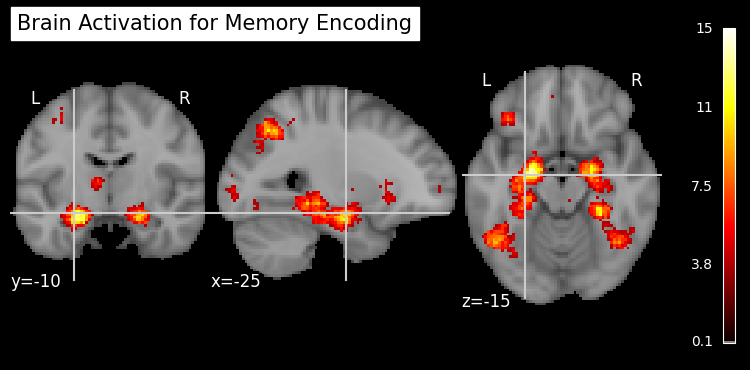

In [5]:
from nilearn.plotting import (
    plot_stat_map,
)  # Import the plot_stat_map function for plotting statistical maps on top of anatomical scans
import matplotlib.pyplot as plt  # Import matplotlib for plotting

# Define the file paths for anatomical and functional MRI data
anatomical_path = "anatomical.nii"
functional_path = "memory encoding_uniformity-test_z_FDR_0.01.nii"

# Define the 3D coordinates to specify the location of the brain activation
cut_coords = [-25, -10, -15]  # x, y, and z coordinates

# Plot the functional MRI data on top of the anatomical brain scan
# The threshold filters out values below this level
# The cut_coords argument defines the 3D coordinates to specify the location of the brain activation
# The cmap argument specifies the colormap to use for the plot (warmer colors indicate stronger activation)
plot_stat_map(
    functional_path,
    bg_img=anatomical_path,
    title="Brain Activation for Memory Encoding",
    threshold=0.1,
    cut_coords=cut_coords,
    cmap="hot",
)

# Display the plot
plt.show()

### Step 3: Plotting a histogram of activation values

This code loads the functional MRI data using the ``nibabel`` library and converts it into a ``numpy`` array for manipulation. It then selects only the positive values, which represent brain regions strongly associated with memory encoding. A histogram is plotted to show how these values are distributed across different brain areas. The plot includes labels for the x-axis (Activation Intensity), y-axis (Frequency), and a title. A grid is also added to the y-axis to enhance readability. The histogram helps visualize the strength of brain activation related to memory encoding.

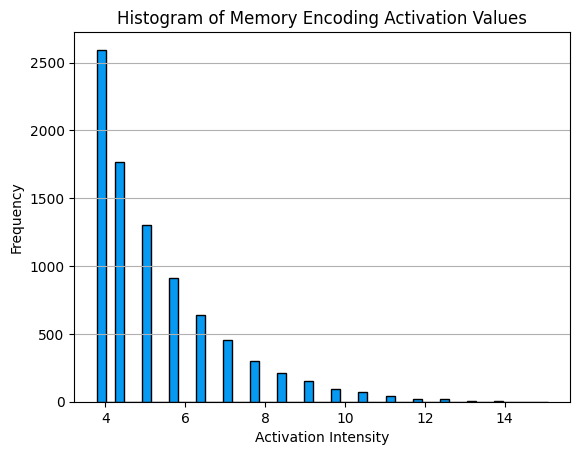

In [6]:
import nibabel as nib  # Import nibabel to load MRI data
import numpy as np  # Import numpy to manipulate the data

# Load the functional MRI data
functional_data = nib.load(
    functional_path
).get_fdata()  # Convert the MRI data into a numpy array for manipulation

# Select all positive values
positive_values = functional_data[functional_data > 0]

# Plot the histogram, with 50 bins for better resolution (bins define the number of bars in the histogram)
plt.hist(
    positive_values, bins=50, color="#069AF3", edgecolor="black"
)  # Plot the histogram with a specific color and edge color

# Add axis labels and title
plt.xlabel(
    "Activation Intensity"
)  # The strength of association between the brain regions and memory encoding
plt.ylabel("Frequency")  # The number of voxels that have a specific activation value
plt.title(
    "Histogram of Memory Encoding Activation Values"
)  # The title of the histogram

# Add a grid to the y-axis to improve readability
plt.grid(axis="y")

# Display the plot
plt.show()

Thank you for reviewing this notebook! If you have any questions or suggestions, feel free to reach out!